In [1]:
from sklearn import tree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
%matplotlib inline

In [2]:
bugs_data = pd.read_csv('../../datasets/bugs/invasion.csv')

In [3]:
X = bugs_data.drop('class', axis=1)
y = bugs_data['class']

In [4]:
rf = RandomForestClassifier(random_state=0)

In [5]:
params = {'n_estimators': range(10, 51, 10),
          'max_depth': range(1, 13, 2),
          'min_samples_leaf': range(1, 8),
          'min_samples_split': range(2, 10, 2)}

In [6]:
grid_cv_clf = GridSearchCV(rf, params, cv=3, n_jobs=-1)

In [7]:
grid_cv_clf.fit(X, y)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=0,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'max

In [8]:
y_test = pd.read_csv('../../datasets/bugs/operative_information.csv')

In [9]:
prediction = grid_cv_clf.predict(y_test)

In [10]:
unique, counts = np.unique(prediction, return_counts=True)
dict(zip(unique, counts))

{'cruiser': 230, 'fighter': 675, 'transport': 595}

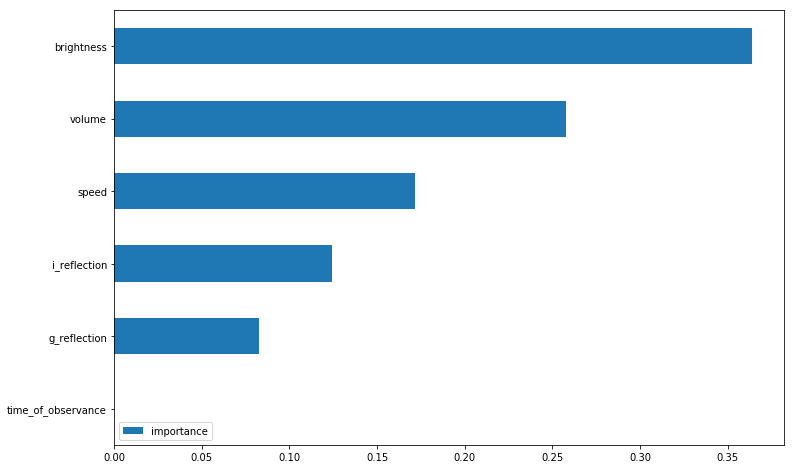

In [11]:
imp = pd.DataFrame(grid_cv_clf.best_estimator_.feature_importances_, index=X.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))

In [12]:
space_data = pd.read_csv('../../datasets/bugs/space_can_be_a_dangerous_place.csv')

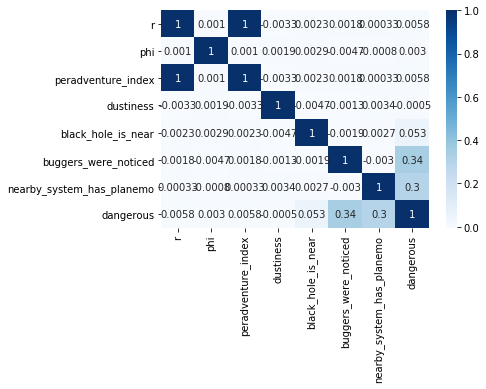

In [18]:
sns.heatmap(space_data.corr(), annot=True, cmap=plt.cm.Blues)